# Linear Regression
## Model to predict weight based on height

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Exploration

In [2]:
# Reading Data
data = pd.read_csv("height_and_weight.csv")

In [3]:
# Top 5 Rows
data.head()

,Index,Height(In),Weight(lbs)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


In [4]:
# Dimensions of the file
data.shape

(200, 3)

In [5]:
# To identify continuous and categorical variables
data.dtypes

Index            int64
Height(In)     float64
Weight(lbs)    float64
dtype: object

#### All the variables are continuous. The target variable is 'Weight(lbs)'.

####  

In [6]:
data.describe()

,Index,Height(In),Weight(lbs)
count,200.000000,200.000000,200.000000
mean,100.500000,67.949800,127.221950
std,57.879185,1.940363,11.960959
min,1.000000,63.430000,97.900000
25%,50.750000,66.522500,119.895000
50%,100.500000,67.935000,127.875000
75%,150.250000,69.202500,136.097500
max,200.000000,73.900000,158.960000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        200 non-null    int64  
 1   Height(In)   200 non-null    float64
 2   Weight(lbs)  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [16]:
# To identify missing values
data.isnull().sum()

Index          0
Height(In)     0
Weight(lbs)    0
dtype: int64

#### There are no missing values in the dataset

####  

### Data Visualization

<AxesSubplot:ylabel='Frequency'>

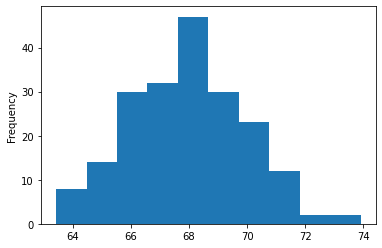

In [7]:
data['Height(In)'].plot.hist()

<AxesSubplot:>

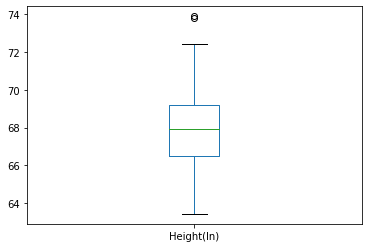

In [8]:
data['Height(In)'].plot.box()

<AxesSubplot:ylabel='Frequency'>

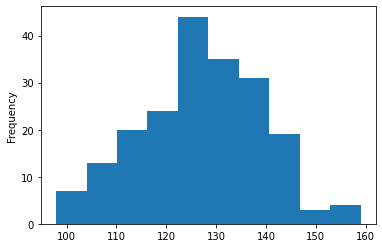

In [9]:
data['Weight(lbs)'].plot.hist()

<AxesSubplot:>

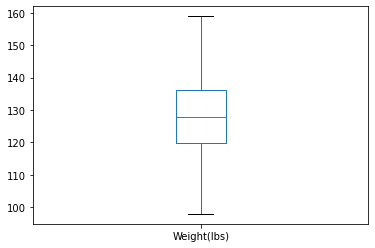

In [10]:
data['Weight(lbs)'].plot.box()

<AxesSubplot:xlabel='Height(In)', ylabel='Weight(lbs)'>

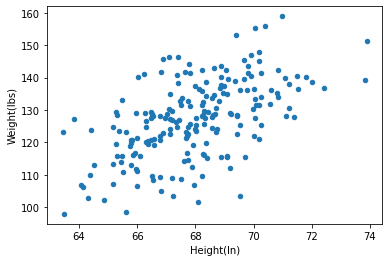

In [12]:
data.plot.scatter('Height(In)','Weight(lbs)')

In [14]:
# To find correlation between 'Height(In)' and 'Weight(lbs)'
data['Height(In)'].corr(data['Weight(lbs)'])

0.5568647346122992

#### There is a positive correlation between 'Height(In)' and Weight(lbs)

####  

### Splitting the data

In [23]:
x = data[['Height(In)']]
y = data['Weight(lbs)']

In [150]:
# Split data into train and test sets (10% test)
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size = 0.1,random_state = 54)

### Training the model

In [151]:
# Fit Regression Model
from sklearn.linear_model import LinearRegression

In [152]:
model = LinearRegression()

In [153]:
model.fit(train_x,train_y)

LinearRegression()

In [154]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [155]:
model.coef_

array([3.35120331])

### Predictions

In [156]:
# Make predictions using this data
pred = model.predict(test_x)

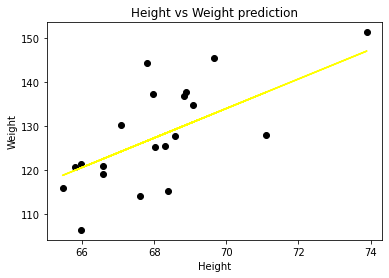

In [157]:
plt.scatter(test_x,test_y,color='black') # Test input and test output in black colour
plt.plot(test_x,pred,color='yellow') # Test input and predicted output in yellow colour
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight prediction")
plt.show()

Text(0, 0.5, 'Predicted Y')

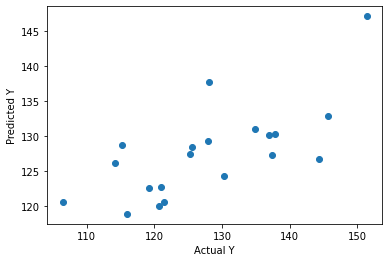

In [158]:
plt.scatter(test_y,pred)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [159]:
from sklearn import metrics

In [160]:
metrics.mean_absolute_error(test_y,pred)

6.689994608921888

In [161]:
metrics.mean_squared_error(test_y, pred)

69.9068319323485

In [162]:
np.sqrt(metrics.mean_squared_error(test_y,pred))

8.36103055444414

In [163]:
# To find accuracy
metrics.r2_score(test_y,pred)

0.46990592458823977

In [164]:
print("My weight prediction:" , np.array(model.predict([[63]])).flatten())

My weight prediction: [110.59817805]
